# 1.Data Loading and Exploration
We start by loading the dataset into a Pandas DataFrame. This step is crucial as it allows us to inspect the data and prepare it for modeling.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from IPython.display import display

data = pd.read_csv('drug200.csv')  


Now,let's explore what is present in our data ,it's characteristics and preprocess it.

In [2]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [5]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
data.duplicated().sum()

0

We don't have any null and duplicate values.So,there's nothing much to preprocess.

# 2. Encoding Categorical Variables
Machine learning models, including decision trees, work with numerical data. Hence, we need to convert categorical variables (Sex, BP, Cholesterol, Drug) into numerical form.

Label Encoding: Converts each unique category value to an integer. For example, 'Male' could become 0 and 'Female' could become 1. This is done using LabelEncoder from sklearn

In [8]:
label_encoders = {}
for column in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


print(data.head())


   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     4
1   47    1   1            0   13.093     2
2   47    1   1            0   10.114     2
3   28    0   2            0    7.798     3
4   61    0   1            0   18.043     4


###### After encoding:

Sex is transformed from 'M' and 'F' to 0 and 1.

BP and Cholesterol are similarly transformed from 'HIGH', 'LOW', 'NORMAL' to numerical values.

Drug (the target variable) is also encoded, where each drug type is assigned a numerical value.

# 3. Data Visualization
Before moving to model training, it's essential to understand the data distributions and relationships. Here are some visualizations:

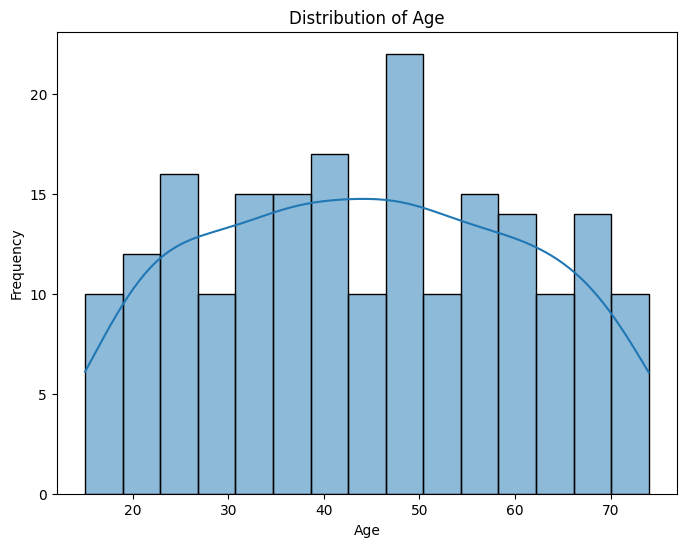

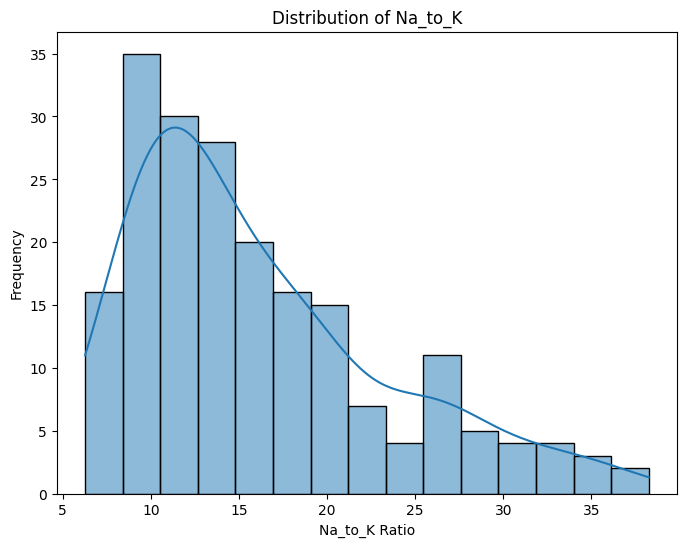

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=15, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(data['Na_to_K'], bins=15, kde=True)
plt.title('Distribution of Na_to_K')
plt.xlabel('Na_to_K Ratio')
plt.ylabel('Frequency')
plt.show()


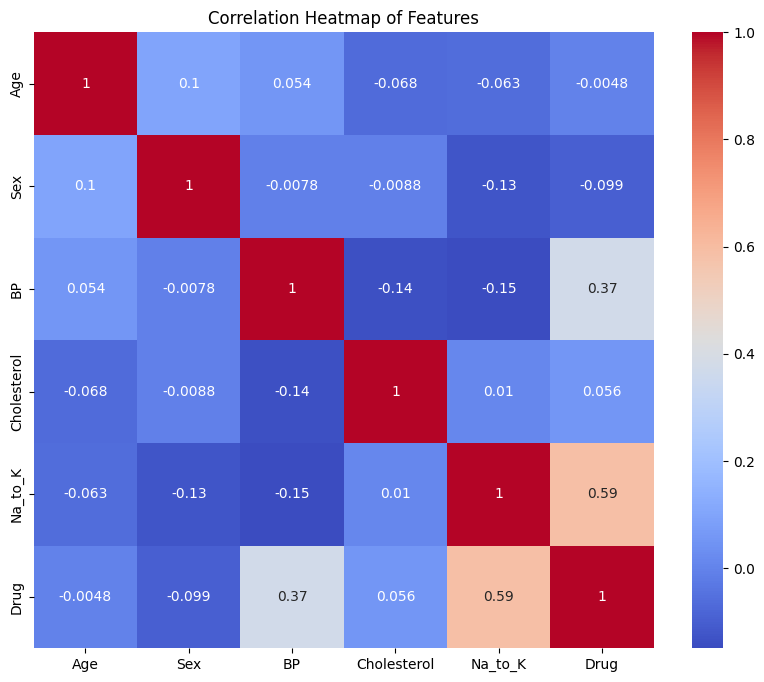

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


#### Relationship Between Features and Target

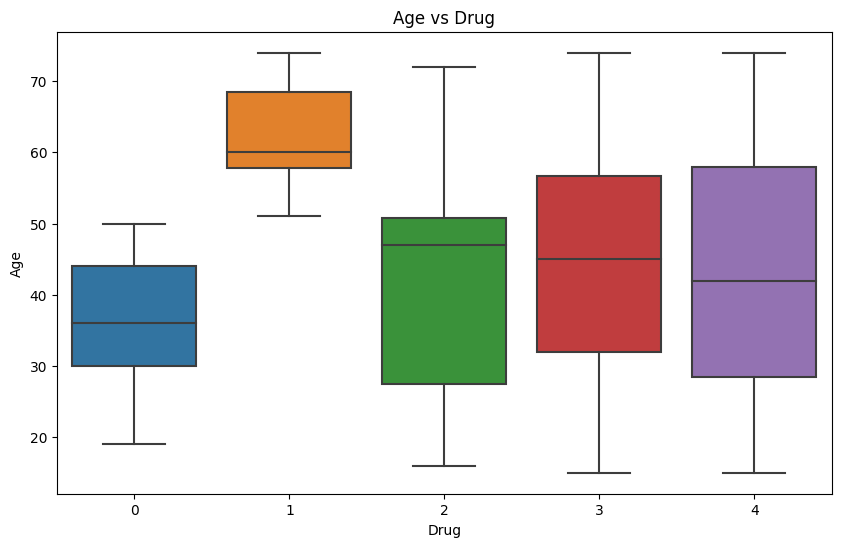

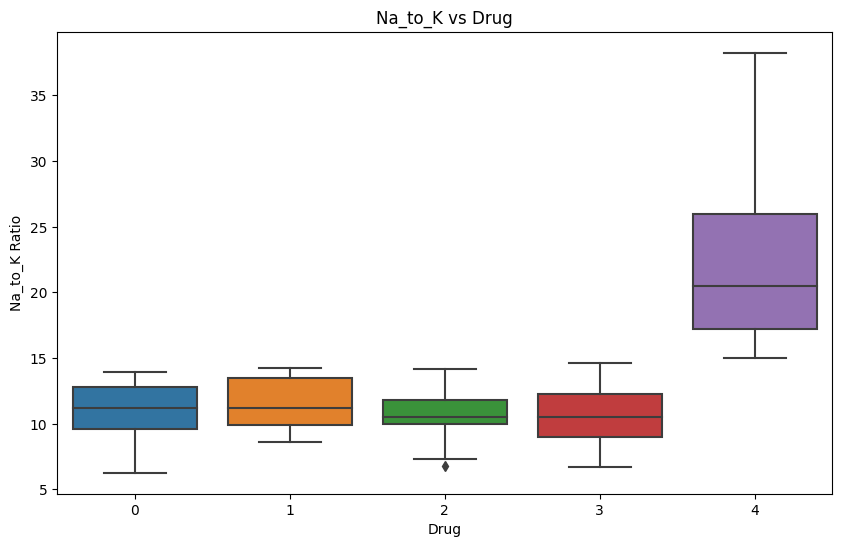

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug', y='Age', data=data)
plt.title('Age vs Drug')
plt.xlabel('Drug')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug', y='Na_to_K', data=data)
plt.title('Na_to_K vs Drug')
plt.xlabel('Drug')
plt.ylabel('Na_to_K Ratio')
plt.show()


# 4. Train-Test Split

Splitting the data into training and testing sets helps to evaluate the model's performance on unseen data. This split prevents overfitting, where the model performs well on training data but poorly on new, unseen data.

In [12]:
X = data.drop('Drug', axis=1)
y = data['Drug']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Here:

X contains the features (Age, Sex, BP, Cholesterol, Na_to_K).

y contains the target variable (Drug).

train_test_split splits the data into 70% training an

# 5. Model Training
We use a Decision Tree Classifier, which is a non-parametric supervised learning method. It works by splitting the dataset into subsets based on the value of the input features.

In [13]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

#### DecisionTreeClassifier:
It builds the decision tree based on the training data by selecting the best features that split the data into homogenous sets with respect to the target variable.



#### Training: 
The fit method learns from the training data and builds the tree.

# 6. Model Evaluation and Testing
To assess the model's performance, we predict the test set results and compare them with the actual values. This is done using accuracy and a classification report.

In [14]:
y_pred = dt_classifier.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



#### Accuracy: 
The proportion of correctly predicted observations to the total observations.


#### Classification Report: 
Provides precision, recall, f1-score, and support for each class, which helps in understanding the model’s performance in more detail.

Now,enter the values to test the model

In [15]:
new_data = pd.DataFrame({
    'Age': [23],#integer
    'Sex': ['F'],#M\F
    'BP': ['HIGH'],#HIGH\LOW\NORMAL
    'Cholesterol': ['NORMAL'],#HIGH|NORMAL,
    'Na_to_K': [32.3]#float
})


for column in ['Sex', 'BP', 'Cholesterol']:
    if column in new_data.columns:
        new_data[column] = label_encoders[column].transform(new_data[column])


prediction = dt_classifier.predict(new_data)
predicted_class = label_encoders['Drug'].inverse_transform(prediction)

print(f'Predicted Drug for the input data: {predicted_class[0]}')

Predicted Drug for the input data: drugY


# 7. Decision Tree Visualization
Visualizing the decision tree helps in understanding how the model makes decisions based on the input features. It shows the splits at each node, the conditions for each split, and the predictions at each leaf node.

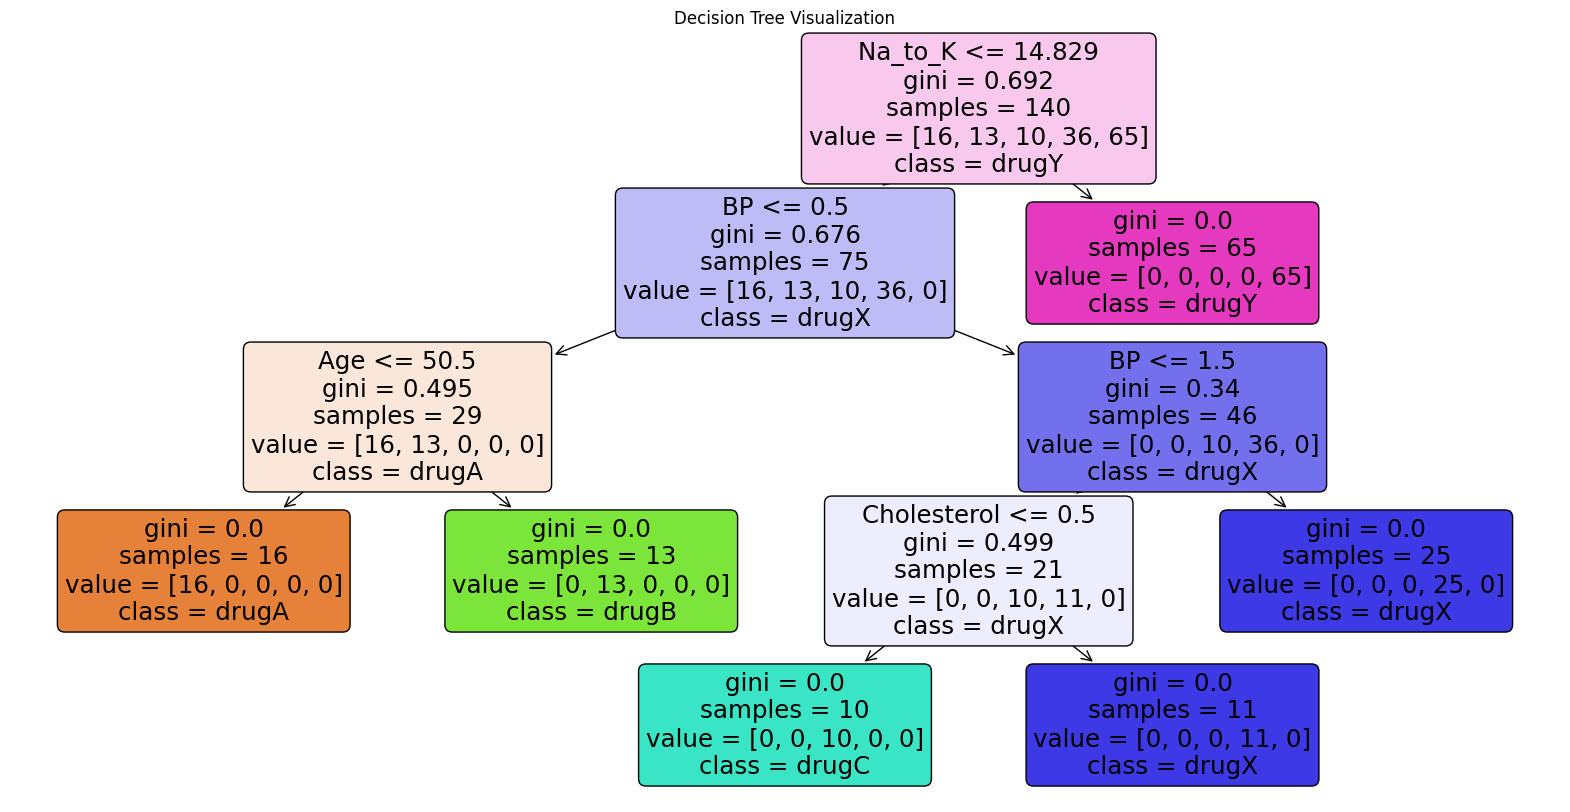

In [16]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=list(X.columns), class_names=list(label_encoders['Drug'].classes_), rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


# 8. Model and Feature Visualizations


###  Feature Importance Plot

Feature importance tells us which features are most influential in predicting the target variable. In a decision tree, the importance of a feature is calculated as the total reduction of the criterion (like Gini or entropy) brought by that feature.

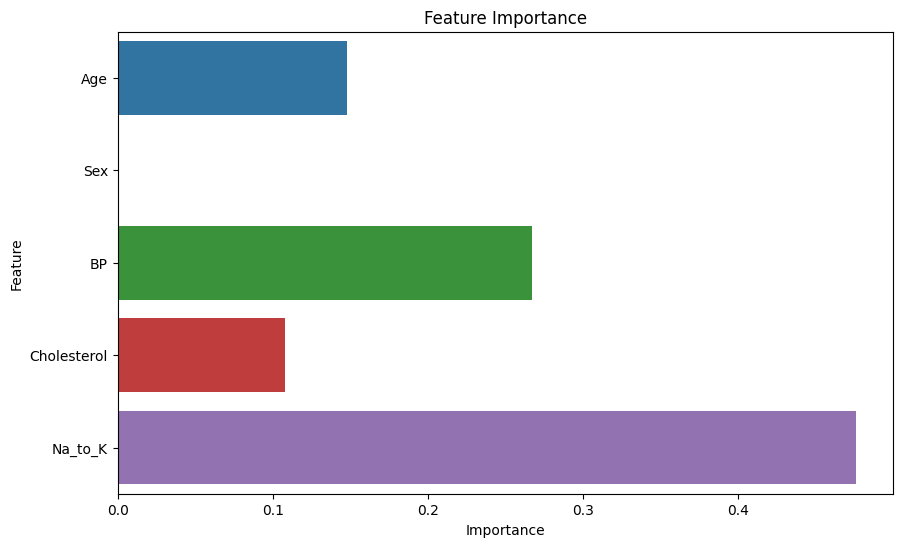

In [17]:
importances = dt_classifier.feature_importances_
feature_names = X.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# 9.Manual Calculation

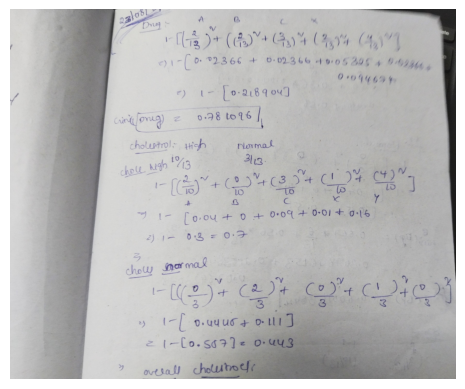

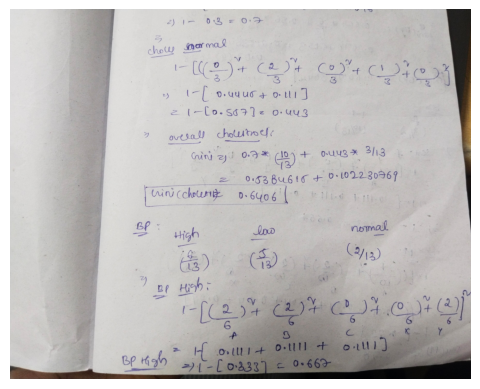

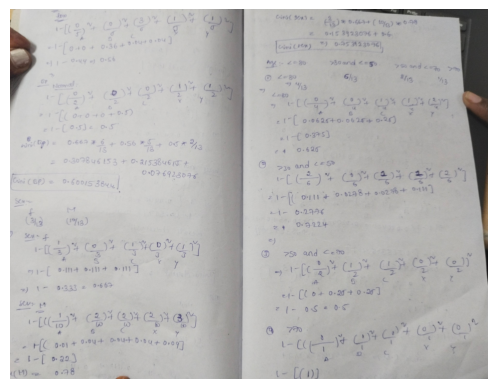

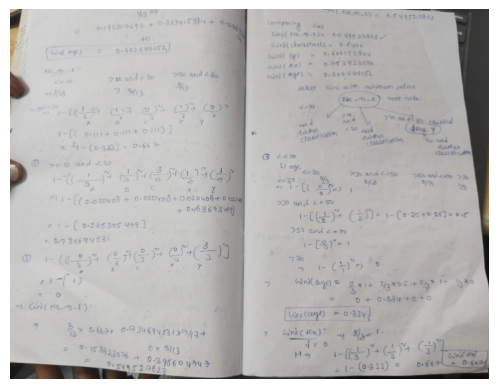

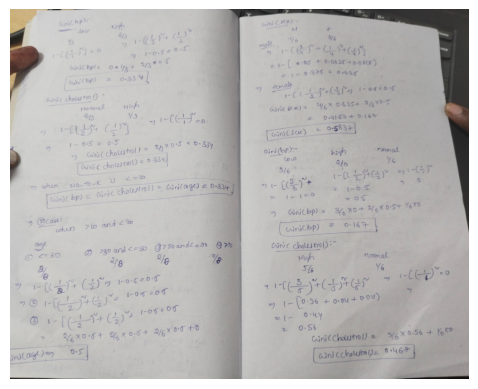

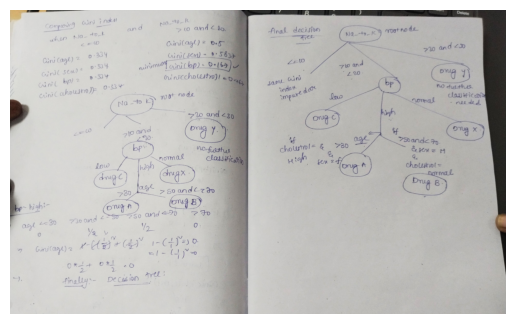

In [20]:
img = mpimg.imread('1.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('2.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('3.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('4.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('5.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('6.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()


